In [ ]:
# Ethan Zhang ez2262
#Gradient Descent
import numpy as np
import math
w = np.random.rand(9,2)
epsilon = 0.1
n = 0.01
D = np.array([[0, 206, 429, 1504, 963, 2976, 3096, 2979, 1949],
             [206, 0, 233, 1308, 802, 2815, 2934, 2786, 1771],
             [429, 233, 0, 1075, 671, 2684, 2799, 2631, 1616],
             [1504, 1308, 1075, 0, 1329, 3273, 3053, 2687, 2037],
             [963, 802, 671, 1329, 0, 2013, 2142, 2054, 996],
             [2976, 2815, 2684, 3273, 2013, 0, 808, 1131, 1307],
             [3095, 2934, 2799, 3053, 2142, 808, 0, 379, 1235],
             [2979, 2786, 2631, 2687, 2054, 1131, 379, 0, 1059],
             [1949, 1771, 1616, 2037, 996, 1307, 1235, 1059, 0]])

def cost(x):
  res = 0
  for i in range(9):
    for j in range(i, 9):
      x_i = w[i]
      x_j = w[j]
      res+=(L2(x_i-x_j) - D[i, j])**2
  return res

def L2(x):
  res = 0
  res = (x[0])**2 + (x[1])**2
  return math.sqrt(res)

def gradient(w):
  res = np.zeros((9, 2))
  for i in range(9):
    sum = np.array([0, 0])
    for j in range(9):
      if i==j:
        continue
      x_i = w[i]
      x_j = w[j]
      sum = sum+2*(L2(x_i-x_j)-D[i, j])*(x_i-x_j)/L2(x_i-x_j)
    res[i]+=sum
  return res
      
def gradient_descent(w, epsilon, n):
  for i in range(10000):
    w_new = w - n*gradient(w)
    w = w_new
  return w

final_w = gradient_descent(w, epsilon, n)

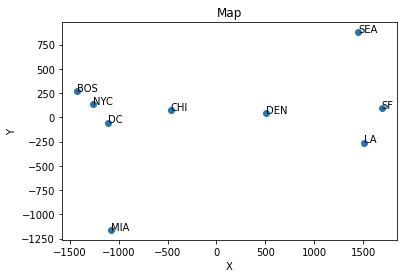

In [ ]:
import matplotlib.pyplot as plt
x = []
for i in range(9):
  x.append(final_w[i, 0])

y = []
for i in range(9):
  y.append(final_w[i, 1])

cities = ["BOS", "NYC", "DC", "MIA", "CHI", "SEA", "SF", "LA", "DEN"]

plt.scatter(x,y)
for i, label in enumerate(cities):
    plt.annotate(label, (x[i], y[i]))
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Map")
plt.savefig("Map")

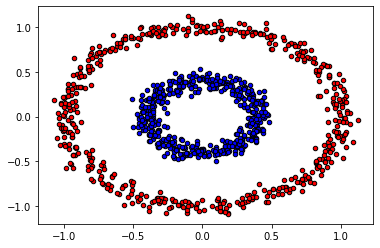

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.datasets import make_circles
data, label = make_circles(n_samples=1000, factor=.4, noise=0.05)
reds = label == 0
blues = label == 1
plt.scatter(data[reds, 0], data[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(data[blues, 0], data[blues, 1], c="blue", s=20, edgecolor='k')
plt.show()
plt.savefig("Circles")

In [ ]:
data.shape[1]

2

In [ ]:
# LLoyd's Algorithm
def initialize(data, k):
  centroids = []
  for i in range(k):
    centroid = np.random.uniform(data.min().min(), data.max().max(), data.shape[1])
    centroids.append(centroid)
  return np.asarray(centroids)

def assign_clusters(data, centroids):
  clusters = []
  for i in range(data.shape[0]):
    errors = []
    for centroid in centroids:
      error = (L2(centroid-data[i]))**2
      errors.append(error)
    nearest_centroid = np.argmin(errors)
    clusters.append(nearest_centroid)
  return clusters

def update_clusters(data, clusters, k):
  counts = [0]*k
  totals = np.zeros((k, 2))
  for i in range(data.shape[0]):
    cluster = clusters[i]
    counts[cluster] = counts[cluster] + 1
    totals[cluster] = totals[cluster] + data[i]
  centroids = []
  for i in range(k):
    centroids.append(totals[i]/counts[i])
  return np.asarray(centroids)

def kmeans(data, k):
  centroids = initialize(data, 2)
  clusters = None
  for i in range(10000):
    clusters = assign_clusters(data, centroids)
    new_centroids = update_clusters(data, clusters, k)
    if np.array_equal(centroids, new_centroids):
      print("done")
      break
    centroids = new_centroids
  return centroids, clusters

done


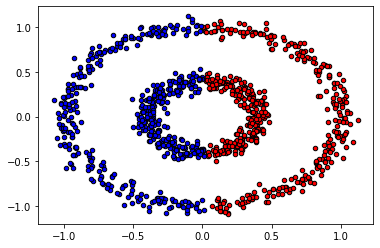

In [ ]:
centroids, clusters = kmeans(data, 2)

reds_x = []
reds_y = []
blues_x = []
blues_y = []
for i in range(data.shape[0]):
  if clusters[i]==0:
    reds_x.append(data[i][0])
    reds_y.append(data[i][1])
  else:
    blues_x.append(data[i][0])
    blues_y.append(data[i][1])

plt.scatter(reds_x, reds_y, c='red', s=20, edgecolor='k')
plt.scatter(blues_x, blues_y, c='blue', s=20, edgecolor='k')
# plt.scatter([centroids[0, 0], centroids[1, 0]], [centroids[0, 1], centroids[1, 1]], c="yellow")
plt.show
plt.savefig("Kmeans1")

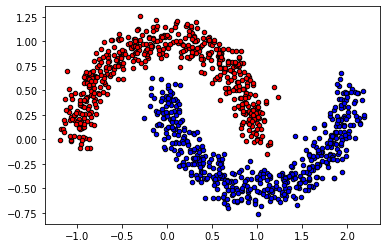

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.datasets import make_moons
data1, label1 = make_moons(n_samples=1000, noise = 0.1)
reds = label1 == 0
blues = label1 == 1
plt.scatter(data1[reds, 0], data1[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(data1[blues, 0], data1[blues, 1], c="blue", s=20, edgecolor='k')
plt.show()
plt.savefig("Moons")

done


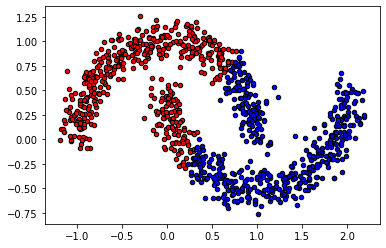

In [ ]:
centroids1, clusters1 = kmeans(data1, 2)

reds_x1 = []
reds_y1 = []
blues_x1 = []
blues_y1 = []
for i in range(data1.shape[0]):
  if clusters1[i]==0:
    reds_x1.append(data1[i][0])
    reds_y1.append(data1[i][1])
  else:
    blues_x1.append(data1[i][0])
    blues_y1.append(data1[i][1])

plt.scatter(reds_x1, reds_y1, c='red', s=20, edgecolor='k')
plt.scatter(blues_x1, blues_y1, c='blue', s=20, edgecolor='k')
# plt.scatter([centroids1[0, 0], centroids1[1, 0]], [centroids1[0, 1], centroids1[1, 1]], c="yellow")
plt.show
plt.savefig("Kmeans2")

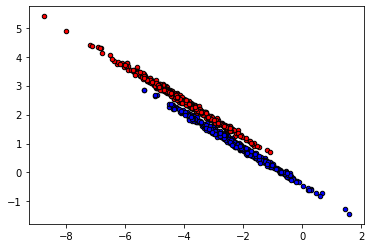

<Figure size 432x288 with 0 Axes>

In [ ]:
from sklearn.datasets import make_blobs
data2, label2 = make_blobs(n_samples=1400, random_state=156)
transformation = [
	[1, -0.6],
	[-0.4, 0.3]
]
data2 = np.dot(data2, transformation)
reds2 = label2 == 0
blues2 = label2 == 1
plt.scatter(data2[reds2, 0], data2[reds2, 1], c="red", s=20, edgecolor='k')
plt.scatter(data2[blues2, 0], data2[blues2, 1], c="blue", s=20, edgecolor='k')
plt.show()
plt.savefig("Toothpicks")

done


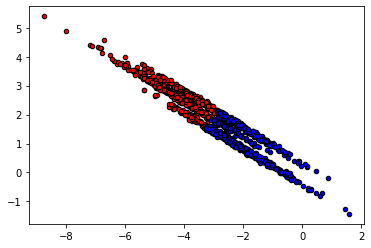

In [ ]:
centroids2, clusters2 = kmeans(data2, 2)

reds_x2 = []
reds_y2 = []
blues_x2 = []
blues_y2 = []
for i in range(data2.shape[0]):
  if clusters2[i]==0:
    reds_x2.append(data2[i][0])
    reds_y2.append(data2[i][1])
  else:
    blues_x2.append(data2[i][0])
    blues_y2.append(data2[i][1])

plt.scatter(reds_x2, reds_y2, c='red', s=20, edgecolor='k')
plt.scatter(blues_x2, blues_y2, c='blue', s=20, edgecolor='k')
# plt.scatter([centroids2[0, 0], centroids2[1, 0]], [centroids2[0, 1], centroids2[1, 1]], c="yellow")
plt.show
plt.savefig("Kmeans3")

In [ ]:
# flexible kmeans
from sklearn.neighbors import kneighbors_graph
from numpy import linalg as LA
def flexible_kmeans(data, k, r):
  G = kneighbors_graph(data, r, mode='distance')
  G = G.toarray()
  W = np.zeros((data.shape[0], data.shape[0]))
  for i in range(G.shape[0]):
    s = G[i].argsort()[:k]
    for j in s:
      W[i, j] = 1
  D = np.zeros((data.shape[0], data.shape[0]))
  for i in range(W.shape[0]):
    D[i, i] = np.sum(W[i]) 
  
  L = D-W
  eigenvalues, eigenvectors = LA.eig(L)
  eigenvectors = eigenvectors.transpose()
  bottom_k = eigenvalues.argsort()[:k]
  V = []
  for vector in bottom_k:
    V.append(eigenvectors[vector])
  V = np.asarray(V)
  V = V.transpose()
  return kmeans(V, k)

  

In [ ]:
flex_centroids, flex_clusters = flexible_kmeans(data, 2, 2)

flex_reds_x = []
flex_reds_y = []
flex_blues_x = []
flex_blues_y = []
for i in range(data.shape[0]):
  if flex_clusters[i]==0:
    flex_reds_x.append(data[i][0])
    flex_reds_y.append(data[i][1])
  else:
    flex_blues_x.append(data[i][0])
    flex_blues_y.append(data[i][1])

plt.scatter(flex_reds_x, flex_reds_y, c='red', s=20, edgecolor='k')
plt.scatter(flex_blues_x, flex_blues_y, c='blue', s=20, edgecolor='k')
plt.scatter([flex_centroids[0, 0], flex_centroids[1, 0]], [flex_centroids[0, 1], flex_centroids[1, 1]], c="yellow")
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


KeyboardInterrupt: ignored

In [ ]:
flex_centroids1, flex_clusters1 = flexible_kmeans(data1, 2, 2)

flex_reds_x1 = []
flex_reds_y1 = []
flex_blues_x1 = []
flex_blues_y1 = []
for i in range(data1.shape[0]):
  if flex_clusters1[i]==0:
    flex_reds_x1.append(data1[i][0])
    flex_reds_y1.append(data1[i][1])
  else:
    flex_blues_x1.append(data1[i][0])
    flex_blues_y1.append(data1[i][1])

plt.scatter(flex_reds_x1, flex_reds_y1, c='red', s=20, edgecolor='k')
plt.scatter(flex_blues_x1, flex_blues_y1, c='blue', s=20, edgecolor='k')
plt.scatter([flex_centroids1[0, 0], flex_centroids1[1, 0]], [flex_centroids1[0, 1], flex_centroids1[1, 1]], c="yellow")
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: ignored

done


<function matplotlib.pyplot.show>

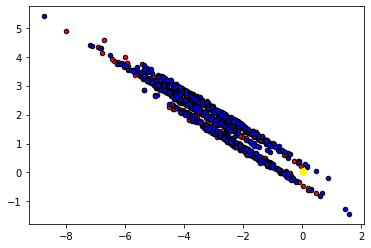

In [ ]:
flex_centroids2, flex_clusters2 = flexible_kmeans(data2, 2, 2)

flex_reds_x2 = []
flex_reds_y2 = []
flex_blues_x2 = []
flex_blues_y2 = []
for i in range(data2.shape[0]):
  if flex_clusters2[i]==0:
    flex_reds_x2.append(data2[i][0])
    flex_reds_y2.append(data2[i][1])
  else:
    flex_blues_x2.append(data2[i][0])
    flex_blues_y2.append(data2[i][1])

plt.scatter(flex_reds_x2, flex_reds_y2, c='red', s=20, edgecolor='k')
plt.scatter(flex_blues_x2, flex_blues_y2, c='blue', s=20, edgecolor='k')
plt.scatter([flex_centroids2[0, 0], flex_centroids2[1, 0]], [flex_centroids2[0, 1], flex_centroids2[1, 1]], c="yellow")
plt.show